In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import pyproj as pj
import matplotlib.pyplot as plt

In [3]:
# Hayes (USGS) mainshock

hay = pd.read_csv('../data/fault_data/hayes_finite_fault.fsp', 
                  delim_whitespace=True, comment='%', skiprows=50,
                  names=['lat', 'lon', 'x', 'y', 'z', 'slip_m', 'rake', 't_rup', 'rise'])

In [4]:
hay.head()

,lat,lon,x,y,z,slip_m,rake,t_rup,rise
0,26.9545,85.8867,112.0661,-140.8269,1.9764,0.1815,75.1493,107.6,9.6
1,27.0305,85.7017,93.6608,-132.5311,1.9764,0.1372,78.2388,98.4,11.2
2,27.1066,85.5166,75.2604,-124.1967,1.9764,0.1409,109.2604,87.2,11.2
3,27.1827,85.3316,56.8998,-115.8346,1.9764,0.0012,105.4416,74.4,1.6
4,27.2587,85.1466,38.5593,-107.4561,1.9764,0.0216,125.1266,60.4,1.6


In [5]:
hay['strike'] = 295.
hay['dip'] = 10.
hay['fault_name'] = 'Hayes_mainshock'

In [6]:
# Hayes (USGS) aftershock

haf = pd.read_csv('../data/fault_data/hayes_finite_fault_aftershock.fsp', 
                  delim_whitespace=True, comment='%', skiprows=50,
                  names=['lat', 'lon', 'x', 'y', 'z', 'slip_m', 'rake', 't_rup', 'rise'])

haf['strike'] = 295.
haf['dip'] = 10.
haf['fault_name'] = 'Hayes_aftershock'

In [7]:
# Zhang Guohong mainshock, aftershock

zm = pd.read_csv('../data/fault_data/zhang_mainshock.txt', skipinitialspace=True,
                 delim_whitespace=True)

za = pd.read_csv('../data/fault_data/zhang_aftershock.txt', skipinitialspace=True,
                 delim_whitespace=True)

In [8]:
zm.slip_m.max(), za.slip_m.max()

(449.34157999999996, 449.31857)

In [9]:
zm.head()

,X_km,Y_km,D_km,lon,lat,slip_m,rake_deg,timing_sec,strike,dip
0,208.52492,2.863831,27.353615,86.835243,28.172752,76.740379,40.055119,81.639603,290,10
1,194.42953,7.994133,27.353615,86.692307,28.218889,4.805708,49.456913,76.563095,290,10
2,180.33414,13.124435,27.353615,86.549248,28.265024,4.649817,87.665901,75.036858,290,10
3,166.23874,18.254738,27.353615,86.406067,28.311161,6.099266,57.908798,81.248512,290,10
4,152.14336,23.385036,27.353615,86.262764,28.357296,4.130292,132.263280,58.819771,290,10


In [10]:
za.head()

,X_km,Y_km,D_km,lon,lat,slip_m,rake_deg,timing_sec,strike,dip
0,212.33490,5.203079,28.004795,86.874535,28.193790,3.000000,61.581440,39.837261,290,10
1,205.28722,7.768227,28.004795,86.803078,28.216858,3.572648,119.263690,25.133089,290,10
2,198.23952,10.333378,28.004795,86.731590,28.239925,4.531709,58.268120,26.381077,290,10
3,191.19183,12.898529,28.004795,86.660072,28.262993,3.095139,67.847687,22.434454,290,10
4,184.14413,15.463676,28.004795,86.588524,28.286060,3.490782,53.494789,28.186106,290,10


In [11]:
zm.slip_m *= 0.01
za.slip_m *= 0.01

In [12]:
htm = pd.read_csv('../data/fault_data/htm_faults.csv')

In [14]:
htm.fault_name.fillna(' ', inplace=True)

In [15]:
htm.tail()

,east,north,depth,point_index,strike,dip,rake,fault_name,htm_ind
1595,333071.108041,3195863.464197,-8696,175,194.926051,55,-90,,922
1596,332868.103509,3197976.078167,-8605,176,194.926051,55,-90,,922
1597,332900.874850,3200349.175353,-8676,177,194.926051,55,-90,,922
1598,333508.166327,3202318.759937,-8796,178,194.926051,55,-90,,922
1599,334474.029461,3205074.635366,-8490,179,194.926051,55,-90,,922


In [16]:
htm['slip_m'] = 0.05

In [17]:
fhm = hay[['z', 'slip_m', 'rake', 'strike', 'dip']]
fha = haf[['z', 'slip_m', 'rake', 'strike', 'dip']]

fzm = zm[['D_km', 'slip_m', 'rake_deg', 'strike', 'dip']]
fza = za[['D_km', 'slip_m', 'rake_deg', 'strike', 'dip']] 

#ff.columns=['east', 'north', 'depth', 'slip_m', 'rake', 'strike', 'dip']

In [18]:
wgs84 = pj.Proj(init='epsg:4326')
utm45 = pj.Proj(init='epsg:32645')

fhm['east'], fhm['north'] = pj.transform(wgs84, utm45, hay.lon.values, hay.lat.values)
fha['east'], fha['north'] = pj.transform(wgs84, utm45, haf.lon.values, haf.lat.values)
fzm['east'], fzm['north'] = pj.transform(wgs84, utm45, zm.lon.values, zm.lat.values)
fza['east'], fza['north'] = pj.transform(wgs84, utm45, za.lon.values, za.lat.values)

/home/ubuntu/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.py

In [19]:
fha.head()

,z,slip_m,rake,strike,dip,east,north
0,8.8991,0.0085,134.8856,295,10,443463.043231,3014154.861090
1,8.8991,0.0945,133.2515,295,10,439348.797390,3017032.179462
2,8.8991,0.0922,144.7212,295,10,435236.509732,3019921.987863
3,8.8991,0.0851,144.2063,295,10,431126.069249,3022802.135406
4,8.8991,0.0680,107.3493,295,10,427017.531555,3025683.701458


In [20]:
fha = fha[['east', 'north', 'z', 'strike', 'dip', 'slip_m', 'rake']]
fha.columns = ['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake']

fhm = fhm[['east', 'north', 'z', 'strike', 'dip', 'slip_m', 'rake']]
fhm.columns = ['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake']

fzm = fzm[['east', 'north', 'D_km', 'strike', 'dip', 'slip_m', 'rake_deg']]
fzm.columns = ['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake']

fza = fza[['east', 'north', 'D_km', 'strike', 'dip', 'slip_m', 'rake_deg']]
fza.columns = ['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake']

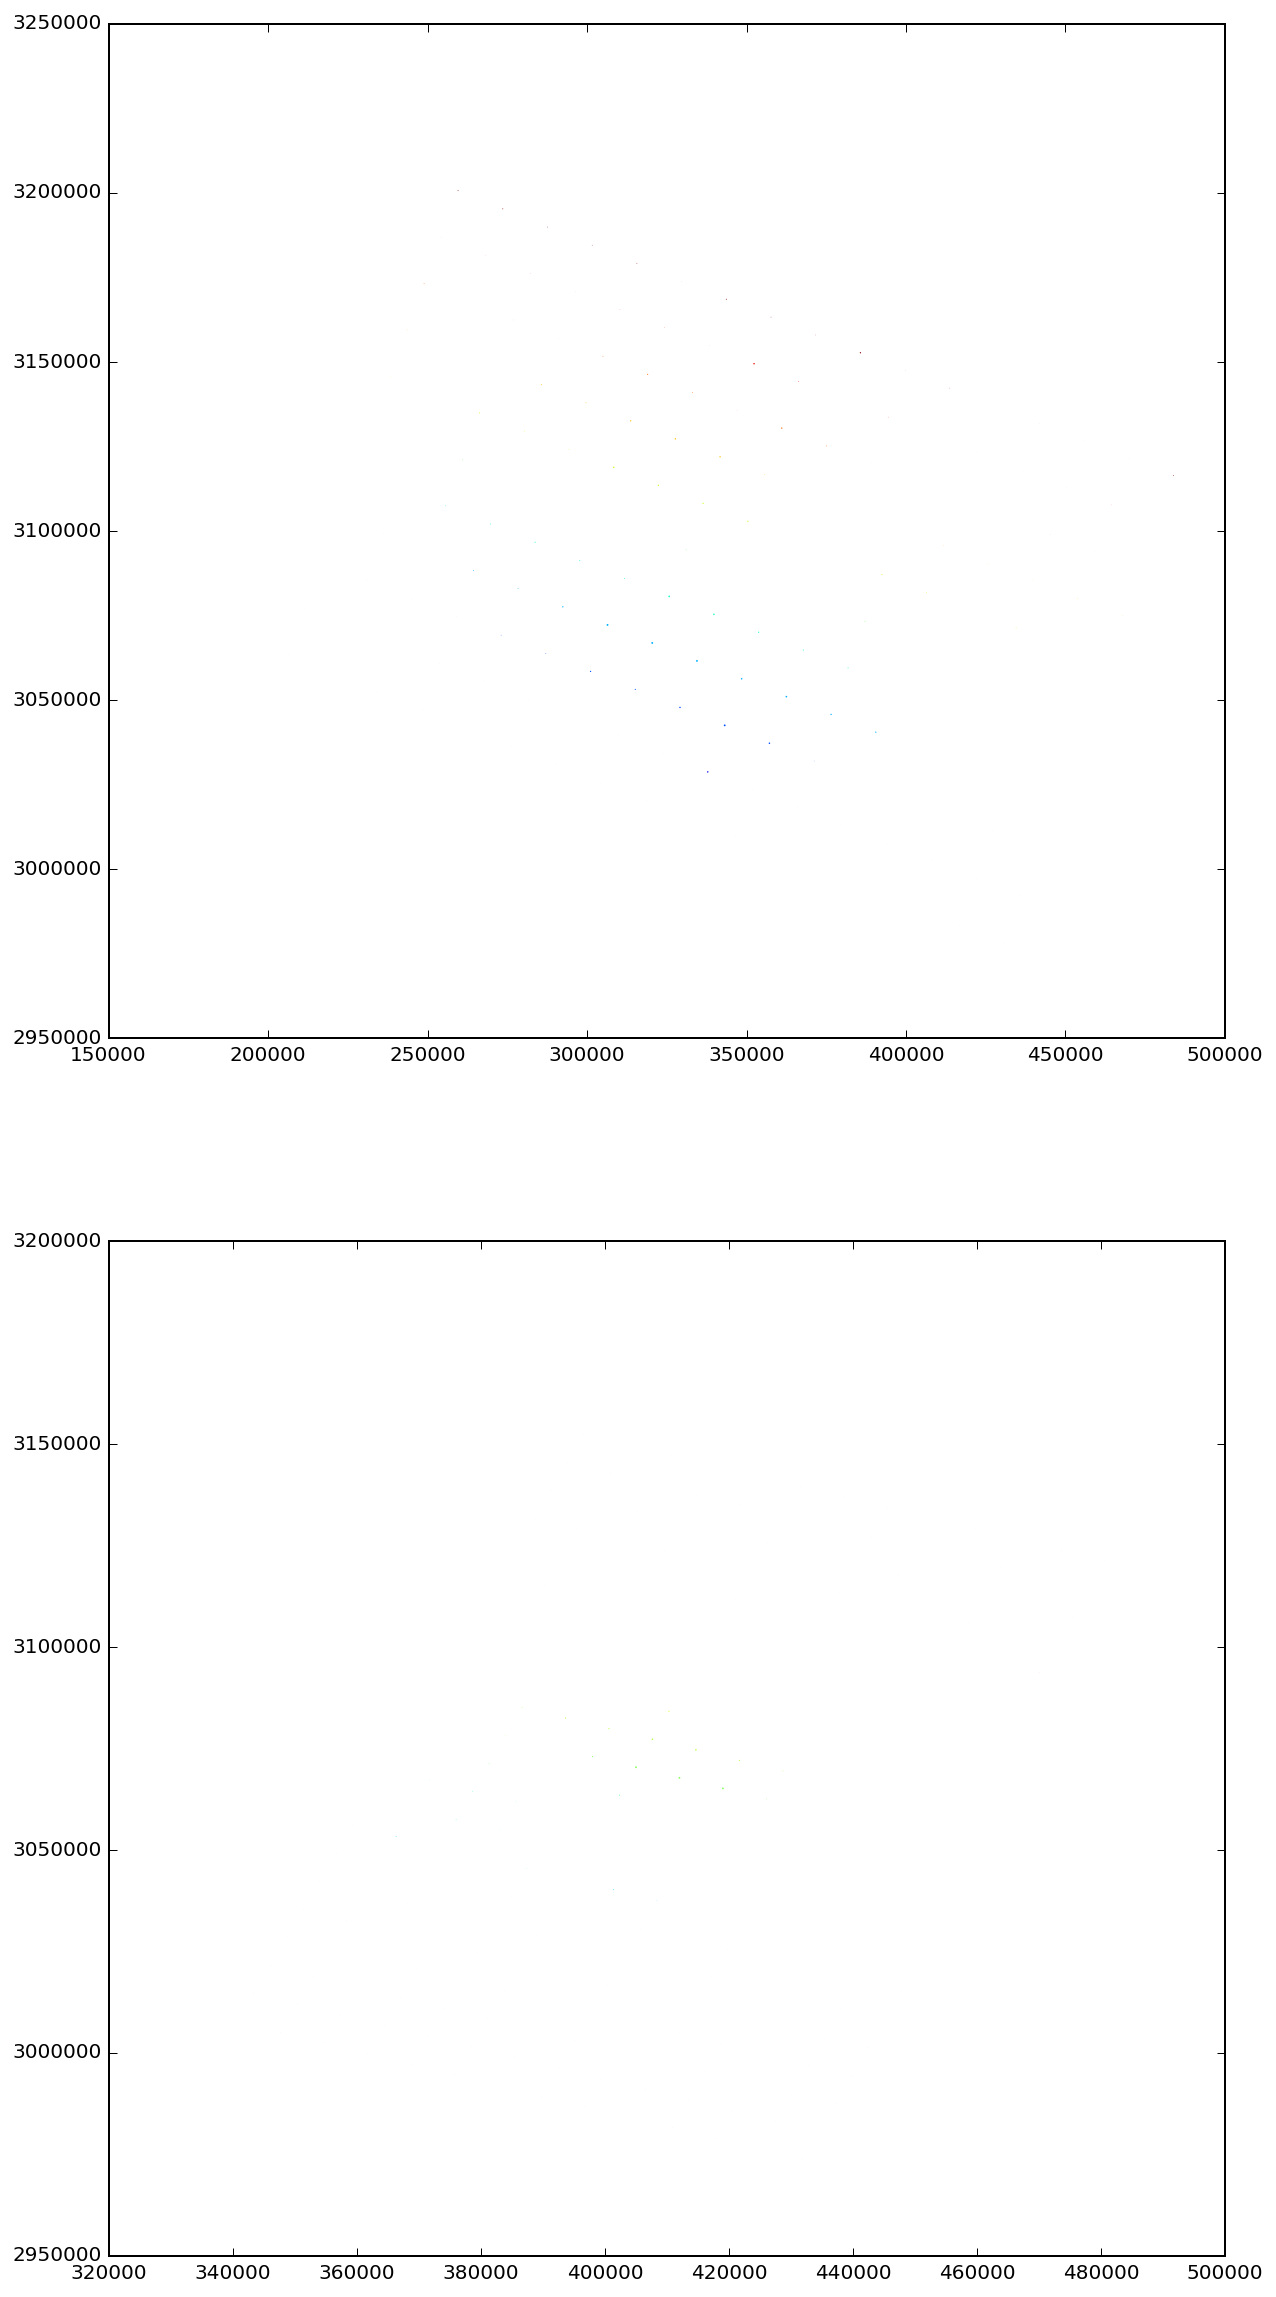

In [21]:
plt.figure(figsize=(10,20))

ax1 = plt.subplot(211)

ax1.scatter(fzm.east, fzm.north, c=fzm.depth, s=fzm.slip_m / 5., lw=0)

ax2 = plt.subplot(212)

ax2.scatter(fza.east, fza.north, c=fza.depth, s=fza.slip_m / 5., lw=0)

plt.show()

In [22]:
fzm['fault_name'] = 'zhang_mainshock'
fzm['point_index'] = fzm.index.values
fzm['htm_ind'] = 9990

fza['fault_name'] = 'zhang_aftershock'
fza['point_index'] = fza.index.values
fza['htm_ind'] = 9991

fhm['fault_name'] = 'hayes_mainshock'
fhm['point_index'] = fhm.index.values
fhm['htm_ind'] = 9999

fha['fault_name'] = 'hayes_aftershock'
fha['point_index'] = fha.index.values
fha['htm_ind'] = 9998

In [23]:
fzm.depth *= -1000
fza.depth *= -1000
fhm.depth *= -1000
fha.depth *= -1000

In [24]:
fms = pd.read_csv('../data/fault_data/fms/all_fms.csv')

fms.head()

,east,north,depth,strike,dip,rake,slip_m,point_index
0,-145783.916307,3340920.485589,33,274,7,79,0.055687,665385
1,550317.779533,2957849.113062,24,179,34,-82,0.003514,663769
2,651905.627526,3375921.827987,33,180,51,-95,0.313154,651572
3,-4458.257140,3341437.570949,33,28,36,-51,0.004963,644075
4,-57968.139114,3258383.542063,34,98,65,90,0.019759,642635


In [25]:
fzm.columns

Index(['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake',
       'fault_name', 'point_index', 'htm_ind'],
      dtype='object')

In [26]:
fms['fault_name'] = 'focal_mech'
fms['htm_ind'] = 9995

In [27]:
faults = pd.concat([htm, fzm, fza, fhm, fha, fms])

In [28]:
faults.shape

(2876, 10)

In [29]:
faults.head()

,depth,dip,east,fault_name,htm_ind,north,point_index,rake,slip_m,strike
0,4623,55,210702.346219,,30,3295884.106254,0,-90,0.05,19.761917
1,4762,55,205435.348084,,30,3287130.049210,1,-90,0.05,19.761917
2,4831,55,200405.436713,,30,3267428.950486,2,-90,0.05,19.761917
3,4677,55,200853.134701,,30,3259918.710871,3,-90,0.05,19.761917
4,4797,55,198732.170284,,30,3242085.302656,4,-90,0.05,19.761917


In [30]:
faults = faults[['east', 'north', 'depth', 'strike', 'dip', 'slip_m', 'rake',
                 'fault_name', 'point_index', 'htm_ind']]

In [31]:
faults.to_csv('../data/fault_data/all_fault_pts.csv')

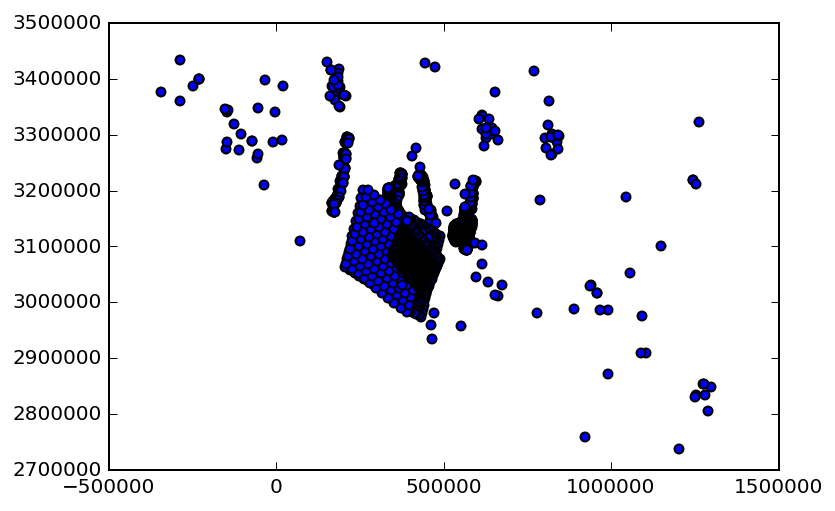

In [32]:
plt.scatter(faults.east, faults.north)